# 重みの可視化

MLPを構築し、1層目から2層目への重みを可視化する。最初にチェック用データで、期待通り重みが可視化できているかをチェック。次にチェックに使用した簡単なデータで、正則化（L1/L2）をした場合、重みがどのように変化するかを見る。

1. 重みの可視化（チェックデータ1）
2. 重みの可視化（チェックデータ2）
3. L1正則化（チェックデータ2）
4. L2正則化（チェックデータ2）

In [59]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.regularizers import l1, l2
%matplotlib inline

In [36]:
# モデル構築
np.random.seed(111)

dim_in = 10

model = Sequential()
model.add(Dense(30, input_dim=dim_in))
model.add(Activation('relu'))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
weights0 = model.get_weights()

## 1. 重みの可視化 (チェックデータ1)

チェック用データとして、インプット(xs1)に正解データ(ys1）を入れる。
正解データがインプットデータに入っているので、モデルが適切に学習すれば、この正解データを入れたunitだけに重みが集中し、正解率も100%になると期待される。

In [ ]:
#  チェック用データの作成
# 正解データをインプットデータのunit#5に代入
# 残りのインプットデータはランダムノイズなので、正解データを予想することは不可能
N1 = 1000
xs1 = np.random.randn(N1, dim_in)
ys1 = np.random.choice([0, 1], N1)
xs1[np.arange(N1), 5] = ys1

Epoch 1/20
1000/1000 [==============================] - 0s - loss: 0.6736 - acc: 0.6000     
Epoch 2/20
1000/1000 [==============================] - 0s - loss: 0.5904 - acc: 0.7790     
Epoch 3/20
1000/1000 [==============================] - 0s - loss: 0.4585 - acc: 0.9230     
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 0.2662 - acc: 0.9880     
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 0.1102 - acc: 0.9990     
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 0.0464 - acc: 1.0000     
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 0.0241 - acc: 1.0000     
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 0.0150 - acc: 1.0000     
Epoch 9/20
1000/1000 [==============================] - 0s - loss: 0.0102 - acc: 1.0000     
Epoch 10/20
1000/1000 [==============================] - 0s - loss: 0.0076 - acc: 1.0000     
Epoch 11/20
1000/1000 [==============================] - 0s - loss: 0

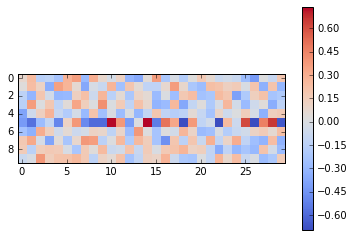

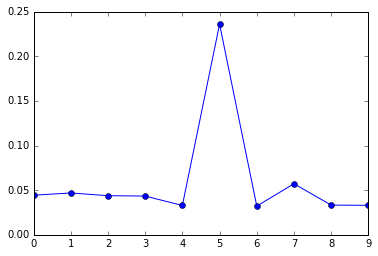

In [56]:
# 学習
model.set_weights(weights0)
model.fit(xs1, ys1, batch_size=30, nb_epoch=20)

# 結果をplot
w1 = model.layers[0].get_weights()[0]
plt.imshow(w1, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.figure()
plt.plot((w1**2).mean(axis=1), 'o-')

### 考察

学習は期待通り、正解率が1.0 = 100%になっている。

1層目の重みを可視化したものが、上記2つの図
- 上のパネルは、縦軸がinput (dim_in=10 units), 横軸がそれぞれのunitから次の層（30 units）へのそれぞれの重みの大きさ。絶対値が大きいほど色が濃くなる。input5番目(pythonに合わせて、0番目始まりで数える)の行の絶対値が大きいのが見て分かる。
- 下のパネルは、行方向（input層）に平均をとったもの（= 各input　unitの次の層への重みの平均）。横軸がinput unitの各番号で、縦軸が平均値。やはり5番目が大きくなっているのがわかる。

両パネルから5番目のunitが、大きくなっているのが見て取れる。5番目のunitは、データ作成時に故意に正解データを入れたunitなので、期待通りこのunitの重みが大きくなっているのが、図に可視化することでわかる。


## 2. 重みの可視化 (チェックデータ2)

別のデータセットで、同様のチェックを行う。チェック用データとして、インプット(xs2)に正解データ(ys2）を入れる。チェックデータ1との違いは、正解データを単純に入れずに、2unitのデータを組み合わせることで、正解データが取り出せるようにした。モデルが適切に学習すれば、この2unitsに重みが集中し成果率も100%になると期待される。

In [1]:
# チェック用データ2
# インプットに正解データを入れる。3, 6番目を足すと正解データになるように調整
N2 = 1000
xs2 = np.random.randn(N, dim_in)
ys2 = np.random.choice([0, 1], N)
xs2[np.arange(N2), 3] = ys2 - xs2[np.arange(N2), 6]

NameError: name 'N' is not defined

Epoch 1/20
1000/1000 [==============================] - 0s - loss: 0.6676 - acc: 0.5800     
Epoch 2/20
1000/1000 [==============================] - 0s - loss: 0.5771 - acc: 0.7340     
Epoch 3/20
1000/1000 [==============================] - 0s - loss: 0.4503 - acc: 0.8560     
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 0.2531 - acc: 0.9820     
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 0.1023 - acc: 0.9940     
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 0.0445 - acc: 0.9980     
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 0.0240 - acc: 0.9990     
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 0.0154 - acc: 1.0000     
Epoch 9/20
1000/1000 [==============================] - 0s - loss: 0.0108 - acc: 1.0000     
Epoch 10/20
1000/1000 [==============================] - 0s - loss: 0.0081 - acc: 1.0000     
Epoch 11/20
1000/1000 [==============================] - 0s - loss: 0

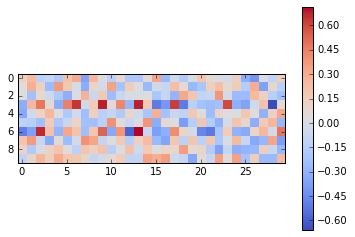

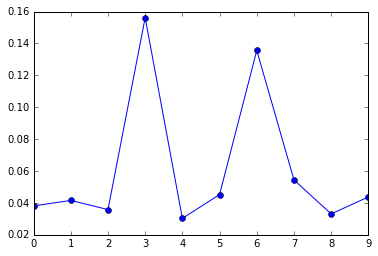

In [58]:
%matplotlib inline
model.set_weights(weights0)
model.fit(xs, ys, batch_size=30, nb_epoch=20)

w1 = model.layers[0].get_weights()[0]
plt.imshow(w1, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.figure()
plt.plot((w1**2).mean(axis=1), 'o-')

### 考察

正解率は100%. 図を見てみると、上パネルだと若干わかりづらいが、下パネルで見れば、3, 6番目の重みが大きくなっている。期待通り。

## 3. L1正則化

チェック用データ2を用いて、L1正則化をモデルに入れた場合に、重みがどのように変化するのか見るために可視化する。

In [60]:
# モデル構築。2との違いは、1層目にL1正則化（ W_regularizer=l1(0.1)）の項を入れたこと
dim_in = 10

model1 = Sequential()
model1.add(Dense(30, input_dim=dim_in, W_regularizer=l1(0.1)))
model1.add(Activation('relu'))
model1.add(Dense(30))
model1.add(Activation('relu'))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
weights1 = model1.get_weights()

Epoch 1/20
1000/1000 [==============================] - 0s - loss: 5.8278 - acc: 0.5450     
Epoch 2/20
1000/1000 [==============================] - 0s - loss: 4.9526 - acc: 0.6020     
Epoch 3/20
1000/1000 [==============================] - 0s - loss: 4.1265 - acc: 0.6340     
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 3.4018 - acc: 0.6570     
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 2.7770 - acc: 0.6780     
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 2.2256 - acc: 0.6820     
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 1.7544 - acc: 0.7010     
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 1.3830 - acc: 0.7160     
Epoch 9/20
1000/1000 [==============================] - 0s - loss: 1.0910 - acc: 0.7030     
Epoch 10/20
1000/1000 [==============================] - 0s - loss: 0.8750 - acc: 0.7220     
Epoch 11/20
1000/1000 [==============================] - 0s - loss: 0

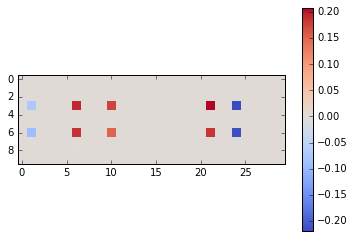

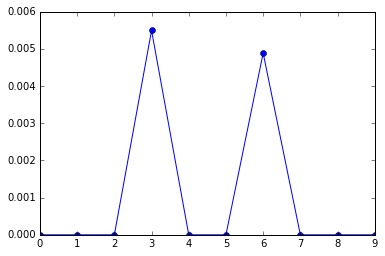

In [63]:
model1.set_weights(weights1)
model1.fit(xs2, ys2, batch_size=30, nb_epoch=20)

w1 = model1.layers[0].get_weights()[0]
plt.imshow(w1, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.figure()
plt.plot((w1**2).mean(axis=1), 'o-')

### 考察

2のチェックデータと同じものを使っている。モデルの構造も同じで、唯一の違いは1層目にL1正則化を入れたこと。
正解率は変わらず100%だが、重みは思った以上に変化があった。L1正則化は教科書に「余分な次元を削除する」役割があるとよく書いてあるが、実際に可視化してみると、思った以上の衝撃。。まずランダムノイズの項（3, 6番以外）は完全に0. 3, 6番目に関しても、5つ以外は全て0。実際、今回のデータセットの場合、3, 6番目に1unitずつあれば十分であることを考えると、ここまでunit数が削除されるのも納得。

また絶対値の大きさも小さくなっている。「正則化は重みの絶対値を小さくする」という教科書の文も「たしかにそうやなー」と確認できる。

## 4. L2正則化

チェック用データ2を用いて、L2正則化をモデルに入れた場合に、重みがどのように変化するのか見るために可視化する。

In [64]:
# モデル構築。L1 -> L2に変更。あとは変更なし。
dim_in = 10

model2 = Sequential()
model2.add(Dense(30, input_dim=dim_in, W_regularizer=l2(0.1)))
model2.add(Activation('relu'))
model2.add(Dense(30))
model2.add(Activation('relu'))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
weights2 = model2.get_weights()

Epoch 1/20
1000/1000 [==============================] - 0s - loss: 2.1273 - acc: 0.5190     
Epoch 2/20
1000/1000 [==============================] - 0s - loss: 1.7530 - acc: 0.6090     
Epoch 3/20
1000/1000 [==============================] - 0s - loss: 1.4740 - acc: 0.6680     
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 1.2526 - acc: 0.7150     
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 1.0724 - acc: 0.7460     
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 0.9157 - acc: 0.8220     
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 0.7603 - acc: 0.9000     
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 0.5871 - acc: 0.9750     
Epoch 9/20
1000/1000 [==============================] - 0s - loss: 0.4177 - acc: 0.9970     
Epoch 10/20
1000/1000 [==============================] - 0s - loss: 0.2981 - acc: 1.0000     
Epoch 11/20
1000/1000 [==============================] - 0s - loss: 0

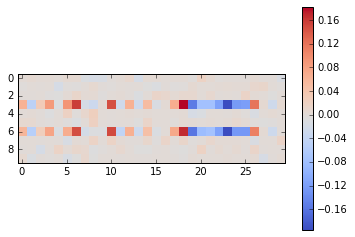

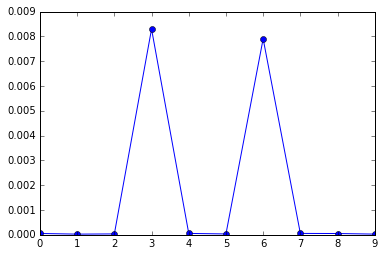

In [65]:
model2.set_weights(weights2)
model2.fit(xs2, ys2, batch_size=30, nb_epoch=20)

w1 = model2.layers[0].get_weights()[0]
plt.imshow(w1, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.figure()
plt.plot((w1**2).mean(axis=1), 'o-')

### 考察

3のL1正則化から、L2に変更（それ以外の変更点はなし）。
正解率は100%。重みを可視化することで、正則化なし、L1正則化、どちらの場合とも異なることがよくわかる。教科書では「L2正則化は重みの絶対値を小さくする」という記述をよく見る。可視化するとその意味がよくわかる。ランダムノイズのような（正解データを推測するのに）不要なデータのunit（3, 6番目以外）の重みは、正則化なしの時と較べて非常に小さくなっているが、L1のときに比べると少し大きな値を持っている。また3, 6番目のunitに関しては、次の層への重みを持つ項はけっこうある。5つしかなかったL1のときとは明らかに異なる。一方で、一つ一つの重みの大きさでいうとL1よりも全体的に小さいように見える。少なくとも正則化なしのときと比べると、明らかに絶対値の大きさが小さくなっていることが確認できる。

というわけで、「不要な次元削除」の際はL1を、「重みを小さくしたい」場合はL2という教科書の意味もわかりやすくなった。また不要データに関しては、どちらの場合もほぼ0まで落としてくれることがわかった。L1だとやり過ぎ感が漂うので、普通に過学習対策ならL2の方が無難だろうな、ということもこれらの図を見れば納得（少なくともっ個人的には）。